# Installing libraries

In [2]:
!pip install geopy
!pip install folium
print('Libraries installed!')

Libraries installed!


# Importing necessary libraries

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
!pip install seaborn
import seaborn as sns

print('Libraries imported!')

Libraries imported!


In [8]:
# Credentials
CLIENT_ID = 'GIG4DDSIAILRPU1YFWDZQVIKZQJEYHSGWCBHNFRHUULZ1OIO' # your Foursquare ID
CLIENT_SECRET = '3ZR34EEXRFVHGOOMBLHHHQ4OP312BQOINQ43YEOTAYU3RXJB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# Scrap data from Wikipedia page into a DataFrame

In [10]:

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [11]:
# First rows of dataframe
data = get_new_york_data()
data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
# shape of dataframe
data.shape

(306, 4)

# Data Analysis

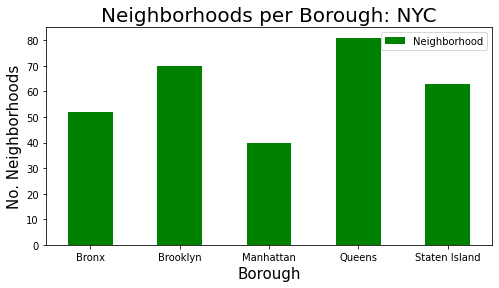

In [17]:
clr = "green"
data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(8,4), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

# Let's analyze further and see how many American restaurants there are in each neighborhood and borough. After it, we'll graph the results.

In [21]:
# defining get venues function
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [22]:
# queens has most neighborhoods
# prepare neighborhood list that contains american restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
american_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    american_restaurants=venues[venues['Category']=='American Restaurant']   
    print('(',count,'/',len(data),')','American Restaurants in '+Neighborhood+', '+Borough+':'+str(len(american_restaurants)))
    print(row)
    for resturant_detail in american_restaurants.values.tolist():
        id, name , category=resturant_detail
        american_rest_ny = american_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) American Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) American Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) American Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) American Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) American Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) American Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) American Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) American Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) American Restaurants in Norwood, B

KeyboardInterrupt: 

In [23]:
#american_rest_ny.to_csv('american_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
american_rest_ny.to_csv('american_rest_ny_tocsv1.csv')


In [24]:
american_ny = pd.read_csv('american_rest_ny_tocsv1.csv')
american_rest_ny.tail()

,Borough,Neighborhood,ID,Name
108,Brooklyn,Dumbo,583c7fa58cfe547612b47b93,Westville DUMBO
109,Brooklyn,Dumbo,51dd7c69498ee00b70fa54b8,Atrium DUMBO
110,Brooklyn,Dumbo,438f7b59f964a520412b1fe3,Superfine
111,Staten Island,Manor Heights,4ba11d67f964a520309937e3,Manor Restaurant
112,Brooklyn,Homecrest,4b928bc0f964a520f90234e3,Three Star Restaurant


In [25]:
american_rest_ny.shape

(113, 4)

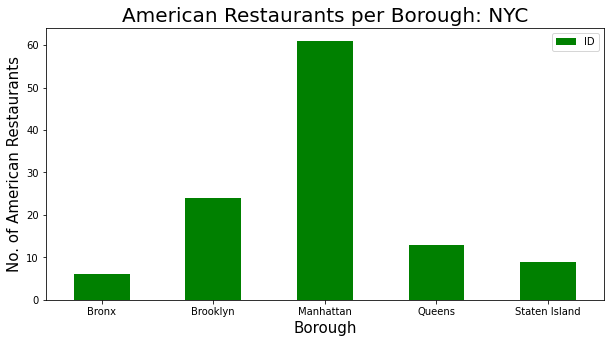

In [26]:
american_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('American Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of American Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()

plt.show()

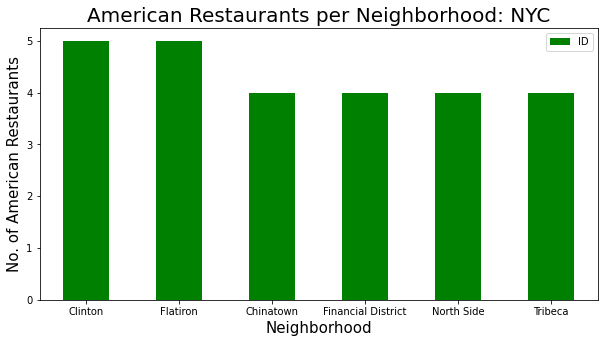

In [27]:
NOofNeigh = 6 # top number for graphing all the same past 6
american_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('American Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of American Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [31]:
american_rest_ny[american_rest_ny['Neighborhood']=='Clinton']

,Borough,Neighborhood,ID,Name
39,Manhattan,Clinton,461f8cc8f964a5207e451fe3,West Bank Cafe
40,Manhattan,Clinton,5854cfc203cf255eb3b9c8cb,Chef's Table At Brooklyn Fare
41,Manhattan,Clinton,4665447af964a5207f471fe3,44 & X
42,Manhattan,Clinton,59f3554f002f4c0655d65bab,Legacy Records
43,Manhattan,Clinton,525d964a11d2be5d7eb1192c,Genuine Roadside


In [33]:

american_rest_ny[american_rest_ny['Neighborhood']=='Flatiron']

,Borough,Neighborhood,ID,Name
98,Manhattan,Flatiron,3fd66200f964a520aee91ee3,Gramercy Tavern
99,Manhattan,Flatiron,4e1a41d3183880768f53f08c,The Cellar at Beecher's
100,Manhattan,Flatiron,5536759a498e56e343077057,Dig Inn
101,Manhattan,Flatiron,3fd66200f964a52080e41ee3,Craft
102,Manhattan,Flatiron,417c4200f964a520c91d1fe3,Tocqueville Restaurant


We got 113 American Restaurants across the New York City.

As we continue our analysis, we see below that although Manhattan had the least number of neighborhoods, it does have the highest number of American restaurants. Additionally, we see how many restaurants the top 6 neighborhoods have. The neighborhood of Greenwich village and Sutton Place has the highest number of American restaurants in all of NYC and is actually located in the boroughs of Manhattan.

So the Clinton & Flatiron in Manhattan has the highest number of American Restaurants with a total count of 5 each.

Now we will get the ranking of each restaurant for further analysis.

In [34]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [36]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
american_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in american_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(american_rest_ny),')','processed')
    american_rest_stats_ny = american_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
american_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '60e48a9eacbd503c80a870d4'}, 'response': {'venue': {'id': '5b65e59064c8e1003946bf7e', 'name': 'The Kitchen', 'contact': {'phone': '7187981002', 'formattedPhone': '(718) 798-1002', 'instagram': 'thekitchen4330'}, 'location': {'address': '4330 Katonah Ave', 'crossStreet': 'E 238th Street', 'lat': 40.899733, 'lng': -73.867408, 'labeledLatLngs': [{'label': 'display', 'lat': 40.899733, 'lng': -73.867408}], 'postalCode': '10470', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4330 Katonah Ave (E 238th Street)', 'New York, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-kitchen/5b65e59064c8e1003946bf7e', 'categories': [{'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restaurants', 'shortName': 'American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats

KeyError: 'venue'

In [37]:
american_rest_stats_ny.to_csv('american_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file

In [38]:
american_rest_stats_ny.shape

(5, 7)

We got statistics for all 113 american Restaurants in New York city.

Let's check what values we have in our DataFrame

american_rest_stats_ny.info()

We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

In [39]:

american_rest_stats_ny['Likes'] = american_rest_stats_ny['Likes'].astype('float64')
american_rest_stats_ny['Tips'] = american_rest_stats_ny['Tips'].astype('float64')
american_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       5 non-null      object 
 1   Neighborhood  5 non-null      object 
 2   ID            5 non-null      object 
 3   Name          5 non-null      object 
 4   Likes         5 non-null      float64
 5   Rating        5 non-null      object 
 6   Tips          5 non-null      float64
dtypes: float64(2), object(5)
memory usage: 408.0+ bytes


In [40]:
# descriptive stats of data
american_rest_stats_ny.describe()

,Likes,Tips
count,5.000000,5.000000
mean,16.800000,9.400000
std,18.157643,12.441865
min,0.000000,0.000000
25%,0.000000,0.000000
50%,13.000000,1.000000
75%,31.000000,22.000000
max,40.000000,24.000000


In [41]:
# Resturant with maximum Likes
american_rest_stats_ny.iloc[american_rest_stats_ny['Likes'].idxmax()]

Borough                            Bronx
Neighborhood                 Parkchester
ID              4adb9b03f964a520552921e3
Name                       Ellie's Diner
Likes                               40.0
Rating                               7.1
Tips                                22.0
Name: 3, dtype: object

In [42]:
# Resturant with maximum Ratings
american_rest_stats_ny.iloc[american_rest_stats_ny['Rating'].idxmax()]

TypeError: reduction operation 'argmax' not allowed for this dtype

In [43]:
# Resturant with maximum Tips
american_rest_stats_ny.iloc[american_rest_stats_ny['Tips'].idxmax()]

Borough                            Bronx
Neighborhood                 City Island
ID              45164517f964a5200a3a1fe3
Name                         Black Whale
Likes                               31.0
Rating                               6.9
Tips                                24.0
Name: 1, dtype: object

# Now identify and visualize neighborhood with the maximum average rating of restaurants

In [53]:
ny_neighborhood_stats=american_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

KeyError: "['Rating'] not in index"

Above are the top neighborhoods with the highest average ratings of american restaurants.

In [45]:
ny_borough_stats=american_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

KeyError: "['Rating'] not in index"

Similarly these are the average ratings of Japanese Restaurants for each Borough

KeyError: 'Rating'

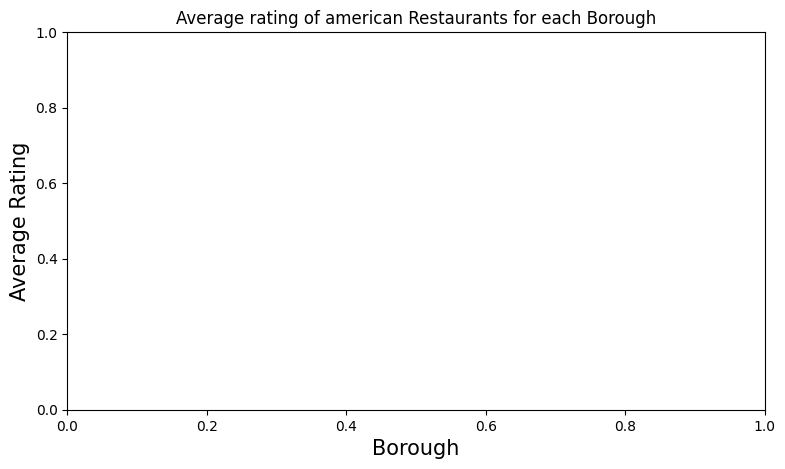

In [46]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of american Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
american_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()


We will consider all the neighborhoods with average rating greater or equal 7.5 to visualize on a map

In [47]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.5]
ny_neighborhood_stats

NameError: name 'ny_neighborhood_stats' is not defined

In [48]:
#  join this Dataset to original New York data to get longitude and latitude
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

NameError: name 'ny_neighborhood_stats' is not defined

In [49]:

# creating a map
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [50]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

NameError: name 'ny_neighborhood_stats' is not defined

In [51]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

NameError: name 'ny_neighborhood_stats' is not defined

Make this Notebook Trusted to load map: File -> Trust Notebook

# Results


Manhattan and Staten Island have the best rated american restaurants on average. Queens and The Bronx have the least amount of american restaurants per borough. However, of note, Greenvich Village & Sutton Palace in Manhattan has the highest number of american Restaurants in all of NY. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of american restaurants. Based on the above information, I would state that Manhattan and Staten Island are the best locations for Japanese cuisine in NYC. To have the best shot of success, I would open a american restaurant in Brooklyn. Brooklyn has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of american restaurants than Manhattan and Staten island, making competition easier. Also we should keep in mind, that real estate prices in Brooklyn are much cheaper than in Manhattan. Finally, I would go to The Kati Roll Company in Manhattan for the best american food based on 835 likes. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.